## Lead Scoring Case Studies

### Project Brief
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage but only a few of them come out as paying customers at the last stage. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

### Step 1: Importing Data

In [1]:
# suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
lead_score_data = pd.read_csv('Lead_scoring_case_studies.csv')
lead_score_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2. Inspecting a Dataframe

In [3]:
lead_score_data.shape

(9240, 37)

In [4]:
lead_score_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
round(100*lead_score_data.isnull().sum()/len(lead_score_data.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Treat Null values, including variable which contains 'Select'

In [7]:
lead_score_data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [8]:
lead_score_data.loc[lead_score_data['Specialization'] == 'Select','Specialization']=np.NaN

In [9]:
lead_score_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [10]:
lead_score_data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [11]:
lead_score_data.loc[lead_score_data['How did you hear about X Education'] == 'Select','How did you hear about X Education']=np.NaN

In [12]:
lead_score_data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [13]:
lead_score_data.loc[lead_score_data['Lead Profile'] == 'Select','Lead Profile']=np.NaN

In [14]:
lead_score_data['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [15]:
lead_score_data['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
lead_score_data.loc[lead_score_data.City == 'Select','City']=np.NaN

In [17]:
lead_score_data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
round(100*lead_score_data.isnull().sum()/len(lead_score_data.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [19]:
# Drop the columns in "lead" which have more than 45% of missing values.
lead_score_data= lead_score_data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score',
                                      'Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile',
                                      'Lead Quality','How did you hear about X Education'] , axis= 1)
lead_score_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [20]:
round(100*lead_score_data.isnull().sum()/len(lead_score_data.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Drop the rows which are having vary less null values

In [21]:
#drop the records with response missings in inp1.
lead_score_data=lead_score_data[-lead_score_data['Last Activity'].isnull()].copy()
lead_score_data=lead_score_data[-lead_score_data['Page Views Per Visit'].isnull()].copy()
lead_score_data=lead_score_data[-lead_score_data['TotalVisits'].isnull()].copy()
lead_score_data=lead_score_data[-lead_score_data['Lead Source'].isnull()].copy()

In [22]:
round(100*lead_score_data.isnull().sum()/len(lead_score_data.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          25.30
Specialization                                   36.17
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [23]:
lead_score_data.shape

(9074, 30)

# Treat all variables one by one

## Treat Variable 'Lead Origin'

In [24]:
lead_score_data['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

## Treat Variable 'Lead Source'

In [25]:
lead_score_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
testone                 1
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
welearnblog_Home        1
blog                    1
Name: Lead Source, dtype: int64

In [26]:
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('Organic Search','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('Reference','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('Welingak Website','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('Referral Sites','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('Facebook','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('bing','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('google','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('Click2call','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('Live Chat','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('Social Media','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('Press_Release','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('testone','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('blog','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('NC_EDM','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('Pay per Click Ads','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('youtubechannel','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('welearnblog_Home','Other_lead_source')
lead_score_data['Lead Source'] = lead_score_data['Lead Source'].replace('WeLearn','Other_lead_source')

In [27]:
lead_score_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Other_lead_source    1910
Olark Chat           1753
Name: Lead Source, dtype: int64

## Treat Variable 'Do Not Email'

In [28]:
lead_score_data['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

## Treat Variable 'Do Not Call'

In [29]:
lead_score_data['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [30]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['Do Not Call'] , axis= 1)

## Treat Variable 'Last Activity'

In [31]:
lead_score_data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [32]:
#find the mode of 'Last Activity'
spe_mode=lead_score_data['Last Activity'].mode()[0]
spe_mode

'Email Opened'

In [33]:
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Olark Chat Conversation", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Page Visited on Website", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Converted to Lead", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Email Bounced", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Email Link Clicked", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Form Submitted on Website", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Unreachable", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Unsubscribed", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Had a Phone Conversation", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("View in browser link Clicked", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Approached upfront", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Email Received", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Email Marked Spam", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Resubscribed to emails", 'other_last_act')
lead_score_data['Last Activity']=lead_score_data['Last Activity'].replace("Visited Booth in Tradeshow", 'other_last_act')

In [34]:
lead_score_data['Last Activity'].value_counts()

Email Opened      3432
other_last_act    2926
SMS Sent          2716
Name: Last Activity, dtype: int64

## Treat Variable 'Country'

In [35]:
lead_score_data['Country'].value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
Canada                     4
South Africa               4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Ghana                      2
China                      2
Uganda                     2
Bangladesh                 2
Netherlands                2
Italy                      2
Belgium                    2
Philippines                2
Russia                     1
Sri Lanka                  1
Switzerland                1
Tanzania                   1
Liberia                    1
Vietnam                    1
Kenya         

In [36]:
#find the mode of 'Country'
country_mode=lead_score_data['Country'].mode()[0]
country_mode

'India'

In [37]:
lead_score_data['Country'].fillna(country_mode,inplace=True)
lead_score_data['Country'].value_counts(normalize = True)

India                   0.968371
United States           0.007604
United Arab Emirates    0.005841
Singapore               0.002645
Saudi Arabia            0.002314
United Kingdom          0.001653
Australia               0.001433
Qatar                   0.001102
Bahrain                 0.000771
Hong Kong               0.000771
France                  0.000661
Oman                    0.000661
unknown                 0.000551
Nigeria                 0.000441
Germany                 0.000441
Canada                  0.000441
South Africa            0.000441
Kuwait                  0.000441
Sweden                  0.000331
Asia/Pacific Region     0.000220
Ghana                   0.000220
China                   0.000220
Uganda                  0.000220
Bangladesh              0.000220
Netherlands             0.000220
Italy                   0.000220
Belgium                 0.000220
Philippines             0.000220
Russia                  0.000110
Sri Lanka               0.000110
Switzerlan

In [38]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['Country'] , axis= 1)

## Treat Variable 'Specialization '

In [39]:
lead_score_data['Specialization'].value_counts()

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Travel and Tourism                   202
Media and Advertising                202
International Business               176
Healthcare Management                156
E-COMMERCE                           111
Hospitality Management               111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [40]:
#find the mode of 'Specialization'
spe_mode=lead_score_data['Specialization'].mode()[0]
spe_mode

'Finance Management'

In [41]:
lead_score_data['Specialization'].fillna(spe_mode,inplace=True)
lead_score_data['Specialization'].value_counts()

Finance Management                   4241
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [42]:
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("Marketing Management", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("Operations Management", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("Business Administration", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("IT Projects Management", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("Supply Chain Management", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("Banking, Investment And Insurance", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("Travel and Tourism", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("Media and Advertising", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("International Business", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("Healthcare Management", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("Hospitality Management", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("E-COMMERCE", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("Retail Management", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("Rural and Agribusiness", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("E-Business", "Other_spec")
lead_score_data['Specialization']=lead_score_data['Specialization'].replace("Services Excellence", "Other_spec")

In [43]:
lead_score_data['Specialization'].value_counts()

Finance Management           4241
Other_spec                   3996
Human Resource Management     837
Name: Specialization, dtype: int64

## Treat Variable 'What is your current occupation '

In [44]:
lead_score_data['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [45]:
#find the mode of 'What is your current occupation'
wco_mode=lead_score_data['What is your current occupation'].mode()[0]
wco_mode

'Unemployed'

In [46]:
lead_score_data['What is your current occupation'].fillna(wco_mode,inplace=True)
lead_score_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.899162
Working Professional    0.074609
Student                 0.022702
Other                   0.001653
Housewife               0.000992
Businessman             0.000882
Name: What is your current occupation, dtype: float64

In [47]:
lead_score_data['What is your current occupation']=lead_score_data['What is your current occupation'].replace("Student", "Other_Occ")
lead_score_data['What is your current occupation']=lead_score_data['What is your current occupation'].replace("Other", "Other_Occ")
lead_score_data['What is your current occupation']=lead_score_data['What is your current occupation'].replace("Housewife", "Other_Occ")
lead_score_data['What is your current occupation']=lead_score_data['What is your current occupation'].replace("Businessman", "Other_Occ")

In [48]:
lead_score_data['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Other_Occ                238
Name: What is your current occupation, dtype: int64

## Treat Variable 'What matters most to you in choosing a course'

In [49]:
lead_score_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [50]:
#find the mode of 'What matters most to you in choosing a course'
wmc_mode=lead_score_data['What matters most to you in choosing a course'].mode()[0]
wmc_mode

'Better Career Prospects'

In [51]:
# fill the missing values with mode value of Tags.
lead_score_data['What matters most to you in choosing a course'].fillna(wmc_mode,inplace=True)
lead_score_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.99978
Flexibility & Convenience    0.00011
Other                        0.00011
Name: What matters most to you in choosing a course, dtype: float64

In [52]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['What matters most to you in choosing a course'] , axis= 1)

## Treat Variable 'Search'

In [53]:
lead_score_data['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [54]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['Search'] , axis= 1)

## Treat Variable 'Magazine'

In [55]:
lead_score_data['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [56]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['Magazine'] , axis= 1)

## Treat Variable 'Newspaper Article'

In [57]:
lead_score_data['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [58]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['Newspaper Article'] , axis= 1)

## Treat Variable 'X Education Forums'

In [59]:
lead_score_data['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [60]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['X Education Forums'] , axis= 1)

## Treat Variable 'Newspaper'

In [61]:
lead_score_data['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [62]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['Newspaper'] , axis= 1)

## Treat Variable 'Digital Advertisement'

In [63]:
lead_score_data['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [64]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['Digital Advertisement'] , axis= 1)

## Treat Variable 'Through Recommendations'

In [65]:
lead_score_data['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [66]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['Through Recommendations'] , axis= 1)

## Treat Variable 'Receive More Updates About Our Courses'

In [67]:
lead_score_data['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [68]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['Receive More Updates About Our Courses'] , axis= 1)

## Treat Variable 'Tags'

In [69]:
lead_score_data['Tags'].value_counts()

Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [70]:
#find the mode of Tags
Tags_mode=lead_score_data.Tags.mode()[0]
Tags_mode

'Will revert after reading the email'

In [71]:
# fill the missing values with mode value of Tags.
lead_score_data.Tags.fillna(Tags_mode,inplace=True)
lead_score_data.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.588825
Ringing                                              0.130813
Interested in other courses                          0.056094
Already a student                                    0.051245
Closed by Horizzon                                   0.033172
switched off                                         0.026449
Busy                                                 0.020388
Lost to EINS                                         0.018955
Not doing further education                          0.015980
Interested  in full time MBA                         0.012784
Graduation in progress                               0.012233
invalid number                                       0.009147
Diploma holder (Not Eligible)                        0.006943
wrong number given                                   0.005180
opp hangup                                           0.003637
number not provided                                  0.002755
in touch

In [72]:
lead_score_data['Tags']= lead_score_data['Tags'].replace("Interested in other courses", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Already a student", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Closed by Horizzon", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("switched off", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Busy", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Lost to EINS", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Not doing further education", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Interested  in full time MBA", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Graduation in progress", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("invalid number", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Diploma holder (Not Eligible)", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("wrong number given", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("opp hangup", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("number not provided", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("in touch with EINS", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Lost to Others", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Want to take admission but has financial problems", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Still Thinking", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("In confusion whether part time or DLP", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Interested in Next batch", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Lateral student", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("University not recognized", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Shall take in the next coming month", "Other Tags")
lead_score_data['Tags']= lead_score_data['Tags'].replace("Recognition issue (DEC approval)", "Other Tags")

In [73]:
lead_score_data['Tags'].value_counts()

Will revert after reading the email    5343
Other Tags                             2544
Ringing                                1187
Name: Tags, dtype: int64

## Treat variable "Update me on Supply Chain Content"

In [74]:
lead_score_data['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [75]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['Update me on Supply Chain Content'] , axis= 1)

## Treat variable "Get updates on DM Content"

In [76]:
lead_score_data['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [77]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['Get updates on DM Content'] , axis= 1)

## Treat variable "City"

In [78]:
lead_score_data['City'].value_counts()

Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [79]:
#find the mode of City
city_mode=lead_score_data.City.mode()[0]
city_mode

'Mumbai'

In [80]:
# fill the missing values with mode value of city.
lead_score_data.City.fillna(city_mode,inplace=True)
lead_score_data.City.value_counts(normalize=True)

Mumbai                         0.744104
Thane & Outskirts              0.082103
Other Cities                   0.074939
Other Cities of Maharashtra    0.049151
Other Metro Cities             0.041547
Tier II Cities                 0.008155
Name: City, dtype: float64

In [81]:
lead_score_data['City']= lead_score_data['City'].replace("Other Cities of Maharashtra", "Other Cities")
lead_score_data['City']= lead_score_data['City'].replace("Other Metro Cities", "Other Cities")
lead_score_data['City']= lead_score_data['City'].replace("Tier II Cities", "Other Cities")

In [82]:
lead_score_data['City'].value_counts()

Mumbai               6752
Other Cities         1577
Thane & Outskirts     745
Name: City, dtype: int64

## Treat Variable 'I agree to pay the amount through cheque'

In [83]:
lead_score_data['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [84]:
# Drop the columns with skewed variables
lead_score_data= lead_score_data.drop(['I agree to pay the amount through cheque'] , axis= 1)

### Treat Variable 'Last Notable Activity'

In [85]:
lead_score_data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [86]:
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("SMS Sent", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("Page Visited on Website", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("Olark Chat Conversation", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("Email Link Clicked", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("Email Bounced", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("Unsubscribed", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("Unreachable", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("Had a Phone Conversation", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("Email Marked Spam", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("Approached upfront", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("Form Submitted on Website", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("Email Received", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("Resubscribed to emails", "Other Activity")
lead_score_data['Last Notable Activity']= lead_score_data['Last Notable Activity'].replace("View in browser link Clicked", "Other Activity")

In [87]:
lead_score_data['Last Notable Activity'].value_counts()

Modified          3267
Other Activity    2984
Email Opened      2823
Name: Last Notable Activity, dtype: int64

In [88]:
lead_score_data['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [89]:
lead_score_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,other_last_act,Finance Management,Unemployed,Other Tags,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Other_lead_source,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Other_spec,Other_Occ,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,other_last_act,Other_spec,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,other_last_act,Finance Management,Unemployed,Will revert after reading the email,Mumbai,No,Modified


#### Converting some binary variables (Yes/No) to 0/1

In [90]:
# List of variables to map

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_score_data[varlist] = lead_score_data[varlist].apply(binary_map)

In [91]:
round(100*lead_score_data.isnull().sum()/len(lead_score_data.index),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [92]:
lead_score_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,other_last_act,Finance Management,Unemployed,Other Tags,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Other_lead_source,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Other_spec,Other_Occ,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,other_last_act,Other_spec,Unemployed,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,other_last_act,Finance Management,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [93]:
lead_score_data.shape

(9074, 16)

In [94]:
lead_score_data.describe()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.078907,0.378554,3.456028,482.887481,2.370151,0.318272
std,23348.029512,0.269608,0.485053,4.858802,545.256560,2.160871,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000
50%,615278.500000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000
75%,637176.500000,0.000000,1.000000,5.000000,922.750000,3.200000,1.000000
max,660737.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


## Univariate Analysis

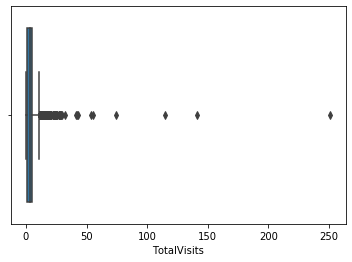

In [95]:
sns.boxplot(lead_score_data.TotalVisits)
plt.show()

In [96]:
lead_score_data.TotalVisits.quantile([0.6,0.75,0.95,0.99,1])

0.60      3.0
0.75      5.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

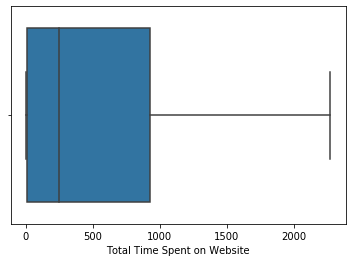

In [97]:
sns.boxplot(lead_score_data['Total Time Spent on Website'])
plt.show()

In [98]:
lead_score_data['Total Time Spent on Website'].quantile([0.6,0.75,0.95,0.99,1])

0.60     367.00
0.75     922.75
0.95    1557.00
0.99    1839.00
1.00    2272.00
Name: Total Time Spent on Website, dtype: float64

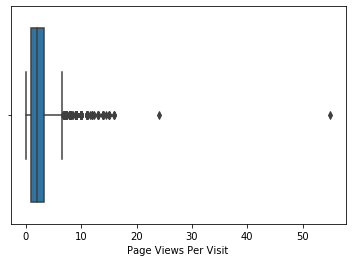

In [99]:
sns.boxplot(lead_score_data['Page Views Per Visit'])
plt.show()

In [100]:
lead_score_data['Page Views Per Visit'].quantile([0.6,0.75,0.95,0.99,1])

0.60     2.5
0.75     3.2
0.95     6.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

## Capping the outliers

In [101]:
Q11 = lead_score_data['TotalVisits'].quantile(0.00)
Q14 = lead_score_data['TotalVisits'].quantile(0.99)
lead_score_data['TotalVisits'][lead_score_data['TotalVisits'] <= Q11]=Q11
lead_score_data['TotalVisits'][lead_score_data['TotalVisits'] >= Q14]=Q14

Q11 = lead_score_data['Page Views Per Visit'].quantile(0.00)
Q14 = lead_score_data['Page Views Per Visit'].quantile(0.99)
lead_score_data['Page Views Per Visit'][lead_score_data['Page Views Per Visit'] <= Q11]=Q11
lead_score_data['Page Views Per Visit'][lead_score_data['Page Views Per Visit'] >= Q14]=Q14

## Bivariate Analysis

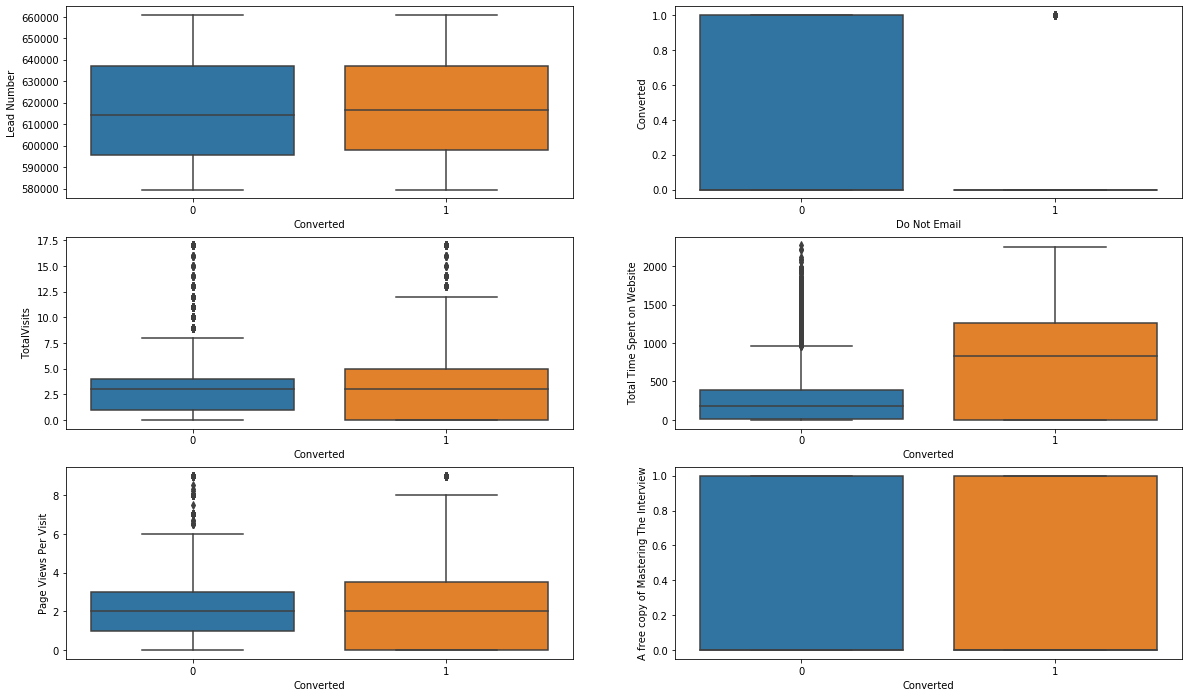

In [102]:
plt.figure(figsize = (20,12))
plt.subplot(3,2,1)
sns.boxplot(x = 'Converted', y = 'Lead Number', data = lead_score_data)
plt.subplot(3,2,2)
sns.boxplot(x = 'Do Not Email', y = 'Converted', data = lead_score_data)
plt.subplot(3,2,3)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = lead_score_data)
plt.subplot(3,2,4)
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data = lead_score_data)
plt.subplot(3,2,5)
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = lead_score_data)
plt.subplot(3,2,6)
sns.boxplot(x = 'Converted', y = 'A free copy of Mastering The Interview', data = lead_score_data)

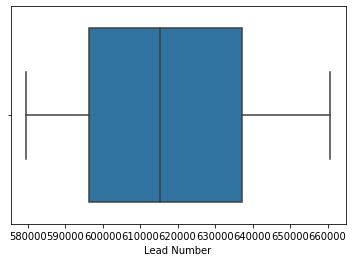

In [103]:
sns.boxplot(lead_score_data['Lead Number'])
plt.show()

In [104]:
lead_score_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
Prospect ID                               9074 non-null object
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null int64
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Specialization                            9074 non-null object
What is your current occupation           9074 non-null object
Tags                                      9074 non-null object
City                                      9074 non-null object
A free copy o

### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [105]:
# Creating a dummy variable for some of the categorical variables and dropping the first one
dummy1 = pd.get_dummies(lead_score_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                        'What is your current occupation',
                                        'Tags', 'City', 'Last Notable Activity']], drop_first=True)
# Adding the results to master Dataframe
lead_score_data = pd.concat([lead_score_data, dummy1], axis = 1)

In [106]:
lead_score_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other_lead_source,Last Activity_SMS Sent,Last Activity_other_last_act,Specialization_Human Resource Management,Specialization_Other_spec,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_Other Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,other_last_act,Finance Management,Unemployed,Other Tags,Mumbai,0,Modified,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Other_lead_source,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Other_spec,Other_Occ,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,other_last_act,Other_spec,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,other_last_act,Finance Management,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [107]:
# We have created dummies for the below variables, so we can drop them
lead_score_data = lead_score_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                        'What is your current occupation','Tags', 'City', 'Last Notable Activity'], 1)

In [108]:
lead_score_data.shape

(9074, 26)

In [109]:
# Checking the percentage of missing values
round(100*(lead_score_data.isnull().sum()/len(lead_score_data.index)), 2)

Prospect ID                                             0.0
Lead Number                                             0.0
Do Not Email                                            0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
A free copy of Mastering The Interview                  0.0
Lead Origin_Landing Page Submission                     0.0
Lead Origin_Lead Add Form                               0.0
Lead Origin_Lead Import                                 0.0
Lead Source_Google                                      0.0
Lead Source_Olark Chat                                  0.0
Lead Source_Other_lead_source                           0.0
Last Activity_SMS Sent                                  0.0
Last Activity_other_last_act                            0.0
Specialization_Human Resource Management

In [110]:
A = pd.DataFrame(lead_score_data['Prospect ID'])

In [111]:
A.head()

,Prospect ID
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620
1,2a272436-5132-4136-86fa-dcc88c88f482
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4,3256f628-e534-4826-9d63-4a8b88782852


In [112]:
A.shape

(9074, 1)

## Train - Test Split

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
# putting feature variable to X
X = lead_score_data.drop(['Prospect ID', 'Converted'],axis = 1)
X.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other_lead_source,Last Activity_SMS Sent,Last Activity_other_last_act,Specialization_Human Resource Management,Specialization_Other_spec,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_Other Activity
0,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
2,660727,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0
4,660681,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [115]:
X.shape

(9074, 24)

In [116]:
# putting feature variable to y
y = lead_score_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [117]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Feature Scaling

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
scaler = StandardScaler()

X_train[['Lead Number', 'TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other_lead_source,Last Activity_SMS Sent,Last Activity_other_last_act,Specialization_Human Resource Management,Specialization_Other_spec,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_Other Activity
3009,0.596345,0,-0.417238,-0.160255,-0.177298,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1012,1.388774,1,-0.417238,-0.540048,-0.177298,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
9226,-1.608557,0,-1.034493,-0.888650,-1.183128,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
4750,-0.123109,0,-0.417238,1.643304,-0.177298,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1
7987,-1.225818,0,0.508645,2.017593,0.074159,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0


#### checking the conversion rate

In [120]:
convert = sum(lead_score_data['Converted'])/len(lead_score_data['Converted'])*100
convert

37.85541106458012

### We have almost 38% of conversion rate

## Looking at correlation

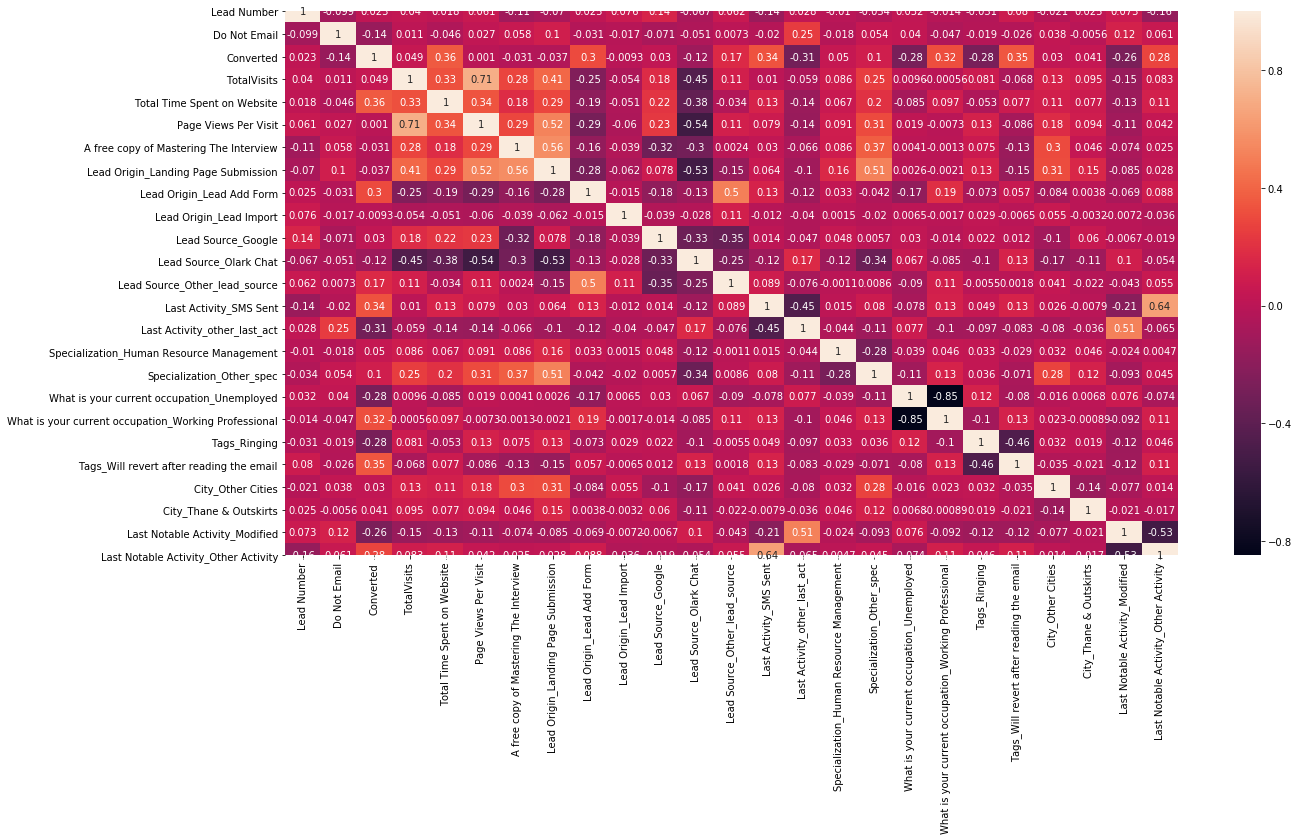

In [121]:
# heatmap
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_score_data.corr(),annot = True)
plt.show()

#### Dropping Highly correlated dummy Variables

In [122]:
X_test.columns

Index(['Lead Number', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Other_lead_source',
       'Last Activity_SMS Sent', 'Last Activity_other_last_act',
       'Specialization_Human Resource Management', 'Specialization_Other_spec',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'City_Other Cities',
       'City_Thane & Outskirts', 'Last Notable Activity_Modified',
       'Last Notable Activity_Other Activity'],
      dtype='object')

In [123]:
X_test = X_test.drop(['Last Activity_other_last_act','What is your current occupation_Working Professional',
                     'Tags_Will revert after reading the email','Last Notable Activity_Modified'],1)

X_train = X_train.drop(['Last Activity_other_last_act','What is your current occupation_Working Professional',
                     'Tags_Will revert after reading the email','Last Notable Activity_Modified'],1)

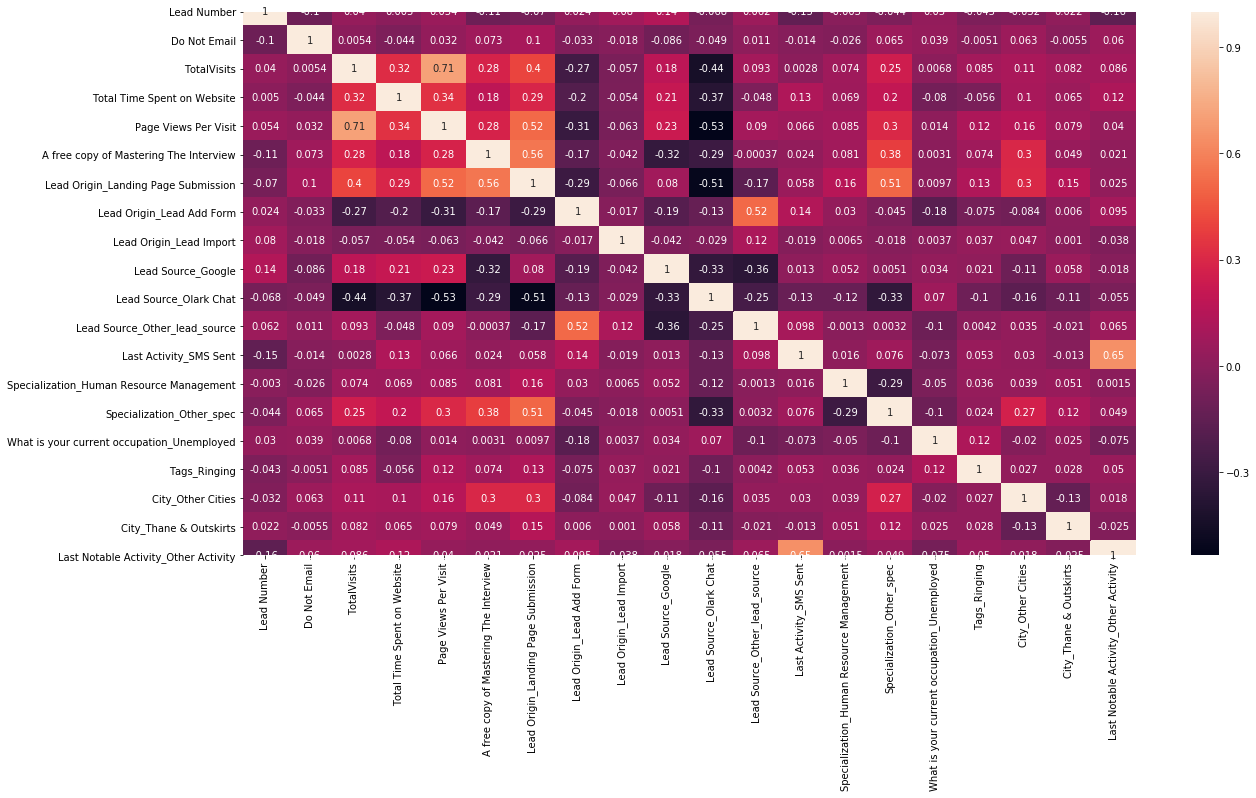

In [124]:
# heatmap
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Model Building

### Running first training model

In [125]:
import statsmodels.api as sm

In [126]:
# logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2394.4
Date:                Sun, 31 May 2020   Deviance:                       4788.8
Time:                        22:45:50   Pearson chi2:                 8.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.1809      0.178     -1.015      0.310      -0.530       0.168
Lead Number                                    0.1108      0.038      2.942      0.003       0.037       0.185
Do Not Email                                  -1.8343      0.180    -10.213      0.000      -2.186      -1.482
TotalVisits                                    0.2454      0.052      4.755      0.000       0.144       0.347
Total Time Spent on Website                    1.1641      0.044     26.340      0.000       1.077       1.251
Page Views Per Visit                          -0.1239      0.059     -2.095      0.036      -0.240      -0.008
A free copy of Mastering The Interview        -0.0543      0.113     -0.479      0.632      -0.277       0.168
Lead Origin_Landing Page Submission           -0.2673      0.121     -2.205      0.027      -0.505      -0.030
Lead Origin_Lead Add Form                      4.7348      0.282     16.789      0.000       4.182       5.288
Lead Origin_Lead Import                        2.0850      0.568      3.668      0.000       0.971       3.199
Lead Source_Google                             0.3070      0.120      2.566      0.010       0.073       0.541
Lead Source_Olark Chat                         1.1856      0.166      7.146      0.000       0.860       1.511
Lead Source_Other_lead_source                  0.0885      0.135      0.658      0.511      -0.175       0.352
Last Activity_SMS Sent                         1.4297      0.100     14.362      0.000       1.235       1.625
Specialization_Human Resource Management       0.5979      0.145      4.114      0.000       0.313       0.883
Specialization_Other_spec                      0.4995      0.101      4.931      0.000       0.301       0.698
What is your current occupation_Unemployed    -1.6935      0.131    -12.939      0.000      -1.950      -1.437
Tags_Ringing                                  -4.3603      0.260    -16.748      0.000      -4.871      -3.850
City_Other Cities                              0.2171      0.105      2.069      0.039       0.011       0.423
City_Thane & Outskirts                         0.2105      0.139      1.518      0.129      -0.061       0.482
Last Notable Activity_Other Activity           0.8765      0.096      9.121      0.000       0.688       1.065
==============================================================================================================
"""

### Feature selection using RFE

In [127]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [128]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train, y_train)

In [129]:
rfe.support_

array([False,  True, False,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [130]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Number', False, 5),
 ('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('A free copy of Mastering The Interview', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Other_lead_source', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_Other_spec', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('Tags_Ringing', True, 1),
 ('City_Other Cities', True, 1),
 ('City_Thane & Outskirts', True, 1),
 ('Last Notable Activity_Other Activity', True, 1)]

In [131]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Last Activity_SMS Sent',
       'Specialization_Human Resource Management', 'Specialization_Other_spec',
       'What is your current occupation_Unemployed', 'Tags_Ringing',
       'City_Other Cities', 'City_Thane & Outskirts',
       'Last Notable Activity_Other Activity'],
      dtype='object')

In [132]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Source_Other_lead_source'],
      dtype='object')

Assesing the model with statsmodels

In [133]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2411.3
Date:                Sun, 31 May 2020   Deviance:                       4822.6
Time:                        22:45:51   Pearson chi2:                 8.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.1218      0.157     -0.774      0.439      -0.430       0.187
Do Not Email                                  -1.8854      0.179    -10.562      0.000      -2.235      -1.536
Total Time Spent on Website                    1.1653      0.044     26.508      0.000       1.079       1.251
Lead Origin_Landing Page Submission           -0.3343      0.112     -2.990      0.003      -0.554      -0.115
Lead Origin_Lead Add Form                      4.6415      0.258     17.962      0.000       4.135       5.148
Lead Origin_Lead Import                        2.1258      0.554      3.836      0.000       1.039       3.212
Lead Source_Google                             0.2993      0.088      3.404      0.001       0.127       0.472
Lead Source_Olark Chat                         0.9896      0.136      7.301      0.000       0.724       1.255
Last Activity_SMS Sent                         1.3407      0.098     13.727      0.000       1.149       1.532
Specialization_Human Resource Management       0.6101      0.144      4.243      0.000       0.328       0.892
Specialization_Other_spec                      0.5160      0.099      5.199      0.000       0.321       0.710
What is your current occupation_Unemployed    -1.6509      0.129    -12.770      0.000      -1.904      -1.398
Tags_Ringing                                  -4.4097      0.261    -16.904      0.000      -4.921      -3.898
City_Other Cities                              0.2012      0.104      1.932      0.053      -0.003       0.405
City_Thane & Outskirts                         0.2328      0.138      1.688      0.091      -0.038       0.503
Last Notable Activity_Other Activity           0.9216      0.094      9.756      0.000       0.736       1.107
==============================================================================================================
"""

In [134]:
# Getting the predicted values on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.091637
1012    0.114126
9226    0.007483
4750    0.941992
7987    0.856440
1281    0.820958
2880    0.067011
4971    0.971347
7536    0.832354
1248    0.056804
dtype: float64

In [135]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0916372 , 0.11412591, 0.0074827 , 0.94199243, 0.85644042,
       0.82095791, 0.06701081, 0.97134707, 0.83235429, 0.056804  ])

##### Creating a dataframe with the actual convert flag and the predicted probabilities

In [136]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'convert_prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,convert_prob,CustID
0,0,0.091637,3009
1,0,0.114126,1012
2,0,0.007483,9226
3,1,0.941992,4750
4,1,0.856440,7987


##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [137]:
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted
0,0,0.091637,3009,0
1,0,0.114126,1012,0
2,0,0.007483,9226,0
3,1,0.941992,4750,1
4,1,0.856440,7987,1


In [138]:
from sklearn import metrics

In [139]:
#Confusion Metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3488  417]
 [ 606 1840]]


In [140]:
# Predicted     not_con    converted
# Actual
# not_con       3488        417
# converted      606       1840  

In [141]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.838923004251299


### Checking VIF

In [142]:
# check for the VIF Variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
# Create a dataframe thdt will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
10,What is your current occupation_Unemployed,4.78
2,Lead Origin_Landing Page Submission,4.73
9,Specialization_Other_spec,3.10
14,Last Notable Activity_Other Activity,2.62
7,Last Activity_SMS Sent,2.57
6,Lead Source_Olark Chat,2.02
5,Lead Source_Google,1.71
12,City_Other Cities,1.45
8,Specialization_Human Resource Management,1.43
3,Lead Origin_Lead Add Form,1.41


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [144]:
col = col.drop('City_Thane & Outskirts', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Last Activity_SMS Sent',
       'Specialization_Human Resource Management', 'Specialization_Other_spec',
       'What is your current occupation_Unemployed', 'Tags_Ringing',
       'City_Other Cities', 'Last Notable Activity_Other Activity'],
      dtype='object')

In [145]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2412.7
Date:                Sun, 31 May 2020   Deviance:                       4825.4
Time:                        22:45:52   Pearson chi2:                 8.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.1179      0.157     -0.750      0.453      -0.426       0.190
Do Not Email                                  -1.8898      0.178    -10.595      0.000      -2.239      -1.540
Total Time Spent on Website                    1.1672      0.044     26.558      0.000       1.081       1.253
Lead Origin_Landing Page Submission           -0.3193      0.111     -2.865      0.004      -0.538      -0.101
Lead Origin_Lead Add Form                      4.6555      0.258     18.036      0.000       4.150       5.161
Lead Origin_Lead Import                        2.1456      0.556      3.860      0.000       1.056       3.235
Lead Source_Google                             0.3020      0.088      3.437      0.001       0.130       0.474
Lead Source_Olark Chat                         0.9889      0.135      7.301      0.000       0.723       1.254
Last Activity_SMS Sent                         1.3392      0.098     13.713      0.000       1.148       1.531
Specialization_Human Resource Management       0.6261      0.143      4.365      0.000       0.345       0.907
Specialization_Other_spec                      0.5338      0.099      5.408      0.000       0.340       0.727
What is your current occupation_Unemployed    -1.6465      0.129    -12.730      0.000      -1.900      -1.393
Tags_Ringing                                  -4.4103      0.261    -16.886      0.000      -4.922      -3.898
City_Other Cities                              0.1660      0.102      1.628      0.104      -0.034       0.366
Last Notable Activity_Other Activity           0.9177      0.094      9.721      0.000       0.733       1.103
==============================================================================================================
"""

In [146]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [147]:
y_train_pred[:10]

array([0.0935735 , 0.11510783, 0.00751121, 0.94218888, 0.85524918,
       0.82422087, 0.06634066, 0.97208916, 0.83871202, 0.05623862])

In [148]:
y_train_pred_final['convert_prob'] = y_train_pred

In [149]:
# Creating new column 'predicted' with 1 if Convert_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x: 1 if x > 0.5 else 0)

In [150]:
y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted
0,0,0.093574,3009,0
1,0,0.115108,1012,0
2,0,0.007511,9226,0
3,1,0.942189,4750,1
4,1,0.855249,7987,1


In [151]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.838923004251299


##### Let's check the VIFs again

In [152]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.77
2,Lead Origin_Landing Page Submission,4.68
9,Specialization_Other_spec,3.07
13,Last Notable Activity_Other Activity,2.61
7,Last Activity_SMS Sent,2.57
6,Lead Source_Olark Chat,2.02
5,Lead Source_Google,1.71
8,Specialization_Human Resource Management,1.43
3,Lead Origin_Lead Add Form,1.41
12,City_Other Cities,1.39


In [153]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('City_Other Cities')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Last Activity_SMS Sent',
       'Specialization_Human Resource Management', 'Specialization_Other_spec',
       'What is your current occupation_Unemployed', 'Tags_Ringing',
       'Last Notable Activity_Other Activity'],
      dtype='object')

In [154]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2414.0
Date:                Sun, 31 May 2020   Deviance:                       4828.1
Time:                        22:45:53   Pearson chi2:                 8.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0975      0.157     -0.622      0.534      -0.405       0.210
Do Not Email                                  -1.8787      0.178    -10.540      0.000      -2.228      -1.529
Total Time Spent on Website                    1.1673      0.044     26.569      0.000       1.081       1.253
Lead Origin_Landing Page Submission           -0.3025      0.111     -2.727      0.006      -0.520      -0.085
Lead Origin_Lead Add Form                      4.6391      0.258     17.990      0.000       4.134       5.145
Lead Origin_Lead Import                        2.1992      0.556      3.955      0.000       1.109       3.289
Lead Source_Google                             0.2809      0.087      3.234      0.001       0.111       0.451
Lead Source_Olark Chat                         0.9768      0.135      7.229      0.000       0.712       1.242
Last Activity_SMS Sent                         1.3416      0.098     13.741      0.000       1.150       1.533
Specialization_Human Resource Management       0.6408      0.143      4.478      0.000       0.360       0.921
Specialization_Other_spec                      0.5592      0.097      5.736      0.000       0.368       0.750
What is your current occupation_Unemployed    -1.6497      0.129    -12.749      0.000      -1.903      -1.396
Tags_Ringing                                  -4.4139      0.261    -16.882      0.000      -4.926      -3.901
Last Notable Activity_Other Activity           0.9151      0.094      9.700      0.000       0.730       1.100
==============================================================================================================
"""

In [155]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [156]:
y_train_pred[:10]

array([0.09649014, 0.11983005, 0.00753944, 0.9361027 , 0.83848452,
       0.82606381, 0.05745102, 0.9726684 , 0.84663906, 0.04958612])

In [157]:
y_train_pred_final['convert_prob'] = y_train_pred

In [158]:
# Creating new column 'predicted' with 1 if convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted
0,0,0.096490,3009,0
1,0,0.119830,1012,0
2,0,0.007539,9226,0
3,1,0.936103,4750,1
4,1,0.838485,7987,1


In [159]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8376633601007716


In [160]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.74
2,Lead Origin_Landing Page Submission,4.59
9,Specialization_Other_spec,2.99
12,Last Notable Activity_Other Activity,2.61
7,Last Activity_SMS Sent,2.57
6,Lead Source_Olark Chat,2.02
5,Lead Source_Google,1.68
8,Specialization_Human Resource Management,1.42
3,Lead Origin_Lead Add Form,1.40
1,Total Time Spent on Website,1.33


In [161]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('What is your current occupation_Unemployed')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Last Activity_SMS Sent',
       'Specialization_Human Resource Management', 'Specialization_Other_spec',
       'Tags_Ringing', 'Last Notable Activity_Other Activity'],
      dtype='object')

In [162]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2503.1
Date:                Sun, 31 May 2020   Deviance:                       5006.3
Time:                        22:45:54   Pearson chi2:                 8.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6101      0.104    -15.531      0.000      -1.813      -1.407
Do Not Email                                -1.8758      0.174    -10.756      0.000      -2.218      -1.534
Total Time Spent on Website                  1.1740      0.043     27.194      0.000       1.089       1.259
Lead Origin_Landing Page Submission         -0.3334      0.108     -3.083      0.002      -0.545      -0.121
Lead Origin_Lead Add Form                    4.7067      0.255     18.466      0.000       4.207       5.206
Lead Origin_Lead Import                      2.2069      0.540      4.085      0.000       1.148       3.266
Lead Source_Google                           0.2607      0.085      3.068      0.002       0.094       0.427
Lead Source_Olark Chat                       0.9547      0.133      7.195      0.000       0.695       1.215
Last Activity_SMS Sent                       1.2818      0.096     13.401      0.000       1.094       1.469
Specialization_Human Resource Management     0.7685      0.140      5.507      0.000       0.495       1.042
Specialization_Other_spec                    0.6757      0.095      7.084      0.000       0.489       0.863
Tags_Ringing                                -4.5692      0.262    -17.471      0.000      -5.082      -4.057
Last Notable Activity_Other Activity         0.9317      0.093     10.064      0.000       0.750       1.113
============================================================================================================
"""

In [163]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [164]:
y_train_pred[:10]

array([0.10605933, 0.02870271, 0.0067862 , 0.94659138, 0.84643576,
       0.83298255, 0.06195177, 0.97757521, 0.87539211, 0.04522971])

In [165]:
y_train_pred_final['convert_prob'] = y_train_pred

In [166]:
# Creating new column 'predicted' with 1 if convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted
0,0,0.106059,3009,0
1,0,0.028703,1012,0
2,0,0.006786,9226,0
3,1,0.946591,4750,1
4,1,0.846436,7987,1


In [167]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8315225948669501


In [168]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.61
9,Specialization_Other_spec,2.98
11,Last Notable Activity_Other Activity,2.61
7,Last Activity_SMS Sent,2.56
8,Specialization_Human Resource Management,1.42
5,Lead Source_Google,1.34
1,Total Time Spent on Website,1.33
3,Lead Origin_Lead Add Form,1.28
6,Lead Source_Olark Chat,1.26
10,Tags_Ringing,1.18


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [169]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3465,  440],
       [ 630, 1816]], dtype=int64)

In [170]:
# Actual/Predicted     not_con     Converted
        # not_con         3468       437
        # Converted        630      1816  

In [171]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8315225948669501

## Metrics beyond simply accuracy

In [172]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7424366312346689

In [174]:
# Let us calculate specificity
TN / float(TN+FP)

0.8873239436619719

In [175]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.11267605633802817


In [176]:
# positive predictive value 
print (TP / float(TP+FP))

0.8049645390070922


In [177]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8461538461538461


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [178]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [179]:
fpr,tpr,threshold=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.convert_prob, drop_intermediate=False)

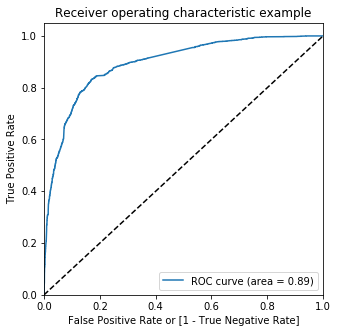

In [180]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.convert_prob)

## Finding optimal cutoff point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [181]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range (10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.convert_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.106059,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.028703,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.006786,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.946591,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.846436,7987,1,1,1,1,1,1,1,1,1,1,0


In [182]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.589199  0.980376  0.344174
0.2   0.2  0.772162  0.896975  0.693982
0.3   0.3  0.806487  0.852821  0.777465
0.4   0.4  0.832152  0.800491  0.851985
0.5   0.5  0.831523  0.742437  0.887324
0.6   0.6  0.823177  0.664759  0.922407
0.7   0.7  0.790112  0.532706  0.951344
0.8   0.8  0.767911  0.443990  0.970807
0.9   0.9  0.725555  0.306623  0.987964


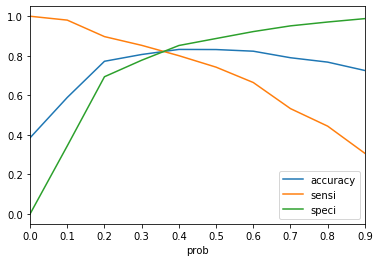

In [183]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [186]:
y_train_pred_final['final_predicted'] = y_train_pred_final.convert_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.106059,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.028703,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.006786,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.946591,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.846436,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [187]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.convert_prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,convert_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.106059,3009,0,1,1,0,0,0,0,0,0,0,0,0,11
1,0,0.028703,1012,0,1,0,0,0,0,0,0,0,0,0,0,3
2,0,0.006786,9226,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.946591,4750,1,1,1,1,1,1,1,1,1,1,1,1,95
4,1,0.846436,7987,1,1,1,1,1,1,1,1,1,1,0,1,85
5,1,0.832983,1281,1,1,1,1,1,1,1,1,1,1,0,1,83
6,0,0.061952,2880,0,1,0,0,0,0,0,0,0,0,0,0,6
7,1,0.977575,4971,1,1,1,1,1,1,1,1,1,1,1,1,98
8,1,0.875392,7536,1,1,1,1,1,1,1,1,1,1,0,1,88
9,0,0.045230,1248,0,1,0,0,0,0,0,0,0,0,0,0,5


In [188]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1958
0     488
Name: final_predicted, dtype: int64

In [189]:
# check the precentage of final_predicted conversions

1958/float(1958+488)

0.8004905968928864

Hence we can see that the final prediction of conversions have a target of 80%  conversion as per the X Educations CEO's requirement . Hence this is a good model. Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [190]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8321524169422139

In [191]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3327,  578],
       [ 488, 1958]], dtype=int64)

In [192]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [193]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.8004905968928864

In [194]:
# Let us calculate specificity
TN / float(TN+FP)

0.8519846350832266

In [195]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.14801536491677336


In [196]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7720820189274448


In [197]:
# Negative predictive value
print (TN / float(TN+ FN))

0.872083879423329


## Precision and Recall

In [198]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3465,  440],
       [ 630, 1816]], dtype=int64)

##### Precision
TP / TP + FP

In [199]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8049645390070922

##### Recall
TP / TP + FN

In [200]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7424366312346689

Using sklearn utilities for the same

In [201]:
from sklearn.metrics import precision_score, recall_score

In [202]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8049645390070922

In [203]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7424366312346689

## Precision and Recall Tradoff

In [204]:
from sklearn.metrics import precision_recall_curve

In [205]:
y_train_pred_final.Converted,y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [206]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.convert_prob)

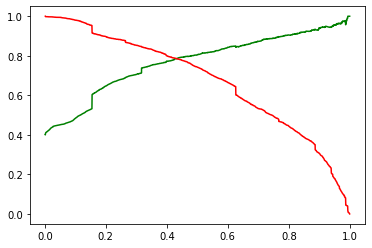

In [207]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making prediction on Test set

In [208]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [209]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Last Activity_SMS Sent,Specialization_Human Resource Management,Specialization_Other_spec,Tags_Ringing,Last Notable Activity_Other Activity
3271,0,-0.591008,0,0,0,1,0,0,0,0,0,0
1490,0,1.894051,1,0,0,0,0,0,0,1,0,0
7936,0,-0.743117,0,0,0,1,0,0,0,0,0,0
4216,0,-0.878732,0,1,0,0,0,0,0,1,0,0
3830,0,-0.578179,1,0,0,0,0,0,0,1,0,0


In [210]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [211]:
y_test_pred = res.predict(X_test_sm)

In [212]:
y_test_pred[:10]

3271    0.114742
1490    0.722280
7936    0.097813
4216    0.939388
3830    0.124929
1800    0.132942
6507    0.017565
4821    0.181264
4223    0.986326
4714    0.400070
dtype: float64

In [213]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [214]:
# Let's see the head
y_pred_1.head()

,0
3271,0.114742
1490,0.722280
7936,0.097813
4216,0.939388
3830,0.124929


In [215]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [216]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [217]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [218]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [219]:
y_pred_final.head()

,Converted,CustID,0
0,0,3271,0.114742
1,1,1490,0.722280
2,0,7936,0.097813
3,1,4216,0.939388
4,0,3830,0.124929


In [220]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'convert_prob'})

In [221]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,CustID,convert_prob
0,0,3271,0.114742
1,1,1490,0.722280
2,0,7936,0.097813
3,1,4216,0.939388
4,0,3830,0.124929


In [222]:
y_pred_final = y_pred_final[["CustID", "Converted", "convert_prob"]]

In [223]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,convert_prob
0,3271,0,0.114742
1,1490,1,0.722280
2,7936,0,0.097813
3,4216,1,0.939388
4,3830,0,0.124929


In [224]:
y_pred_final['final_predicted'] = y_pred_final.convert_prob.map(lambda x: 1 if x > 0.42 else 0)

In [225]:
y_pred_final.head()

,CustID,Converted,convert_prob,final_predicted
0,3271,0,0.114742,0
1,1490,1,0.722280,1
2,7936,0,0.097813,0
3,4216,1,0.939388,1
4,3830,0,0.124929,0


In [226]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.convert_prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,CustID,Converted,convert_prob,final_predicted,lead_score
0,3271,0,0.114742,0,11
1,1490,1,0.722280,1,72
2,7936,0,0.097813,0,10
3,4216,1,0.939388,1,94
4,3830,0,0.124929,0,12
5,1800,1,0.132942,0,13
6,6507,0,0.017565,0,2
7,4821,0,0.181264,0,18
8,4223,1,0.986326,1,99
9,4714,0,0.400070,0,40


In [229]:
# checking if cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    760
0    229
Name: final_predicted, dtype: int64

In [230]:
# check the precentage of final_predicted conversions on test data

760/float(760+229)

0.7684529828109201

Hence we can see that the final prediction of conversions have a target rate of 77% (76.8%). Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [231]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8273962541314727

In [232]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1493,  241],
       [ 229,  760]], dtype=int64)

In [233]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [234]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7684529828109201

In [235]:
# Let us calculate specificity
TN / float(TN+FP)

0.8610149942329873

## Making prediction on Parent Data

In [236]:
X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [237]:
X = X[col]
X.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Last Activity_SMS Sent,Specialization_Human Resource Management,Specialization_Other_spec,Tags_Ringing,Last Notable Activity_Other Activity
0,0,-0.885664,0,0,0,0,1,0,0,0,0,0
1,0,0.350519,0,0,0,0,0,0,0,0,1,0
2,0,1.924177,1,0,0,0,0,0,0,1,0,0
3,0,-0.326263,1,0,0,0,0,0,0,1,1,0
4,0,1.733431,1,0,0,1,0,0,0,0,0,0


In [238]:
X_sm = sm.add_constant(X)

Making predictions on the test set

In [239]:
y_pred = res.predict(X_sm)

In [240]:
y_pred[:10]

0    0.155105
1    0.003117
2    0.729318
3    0.001985
4    0.587157
5    0.155105
6    0.815239
7    0.155105
8    0.103896
9    0.094129
dtype: float64

In [241]:
# Converting y_pred to a dataframe which is an array
y_pred_2 = pd.DataFrame(y_pred)

In [242]:
# Let's see the head
y_pred_2.head()

,0
0,0.155105
1,0.003117
2,0.729318
3,0.001985
4,0.587157


In [243]:
# Converting y_test to dataframe
y_df = pd.DataFrame(y)

In [244]:
# Putting CustID to index
y_df['CustID'] = y_df.index

In [245]:
# Removing index for both dataframes to append them side by side 
y_pred_2.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [246]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_df, y_pred_2],axis=1)

In [247]:
y_pred_final.head()

,Converted,CustID,0
0,0,0,0.155105
1,0,1,0.003117
2,1,2,0.729318
3,0,3,0.001985
4,1,4,0.587157


In [248]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'convert_prob'})

In [249]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,CustID,convert_prob
0,0,0,0.155105
1,0,1,0.003117
2,1,2,0.729318
3,0,3,0.001985
4,1,4,0.587157


In [250]:
y_pred_final = y_pred_final[["CustID", "Converted", "convert_prob"]]

In [251]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,convert_prob
0,0,0,0.155105
1,1,0,0.003117
2,2,1,0.729318
3,3,0,0.001985
4,4,1,0.587157


In [252]:
y_pred_final['final_predicted'] = y_pred_final.convert_prob.map(lambda x: 1 if x > 0.4 else 0)

In [253]:
y_pred_final.head()

,CustID,Converted,convert_prob,final_predicted
0,0,0,0.155105,0
1,1,0,0.003117,0
2,2,1,0.729318,1
3,3,0,0.001985,0
4,4,1,0.587157,1


In [254]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8305047388141944

In [255]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[4806,  833],
       [ 705, 2730]], dtype=int64)

In [256]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [257]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7947598253275109

In [258]:
# Let us calculate specificity
TN / float(TN+FP)

0.8522787728320624

In [259]:
y_pred_final.shape

(9074, 4)

In [260]:
A.reset_index(inplace=True,drop=True)
y_pred_final.reset_index(inplace=True,drop=True)

In [261]:
final_output = pd.concat([A, y_pred_final], axis=1)

In [262]:
final_output['Score'] = final_output.convert_prob.map(lambda x: round(x*100,0))
final_output = final_output.drop(['CustID','Converted','convert_prob','final_predicted'], axis = 1)
final_output.head()

,Prospect ID,Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,16.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,73.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.0
4,3256f628-e534-4826-9d63-4a8b88782852,59.0


In [263]:
final_output.shape

(9074, 2)

Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 83%, 77% and 86% which are approximately closer to 
  the respective values calculated using trained set which is 83%, 74% and 88% respectively.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.   